In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date
from sqlalchemy.sql.expression import and_, extract
from pprint import pprint

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
session = Session(engine)
inspector = inspect(engine)
table_names = inspector.get_table_names()
for table_name in table_names:
    print(table_name)
    columns = inspector.get_columns(table_name)
    pprint(columns)

measurement
[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'date',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'prcp',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'tobs',
  'nullable': True,
  'primary_key': 0,
  'type': FLOAT()}]
station
[{'autoincrement': 'auto',
  'default': None,
  'name': 'id',
  'nullable': False,
  'primary_key': 1,
  'type': INTEGER()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'station',
  'nullable': True,
  'primary_key': 0,
  'type': TEXT()},
 {'autoincrement': 'auto',
  'default': None,
  'name': 'name',
  'nullable': True,
  'primary_key': 0,
  '

In [6]:
base = declarative_base()

class Measurement(base):
    __tablename__ = "measurement"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date  = Column(String)
    prcp  = Column(Float)
    tobs  = Column(Float)

class Station(base):
    __tablename__ = "station"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)
    
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
session = Session(bind=engine)

# Exploratory Climate Analysis
* Design a query to retrieve the last 12 months of precipitation data and plot the results
* Calculate the date 1 year ago from the last data point in the database
* Perform a query to retrieve the date and precipitation scores
* Save the query results as a Pandas DataFrame and set the index to the date column
* Sort the dataframe by date
* Use Pandas Plotting with Matplotlib to plot the data

In [7]:
# Finding the minimum and maximum dates
min_date, max_date = session.query(func.min(Measurement.date), func.max(Measurement.date)).first()
print(min_date," , ", max_date)

2010-01-01  ,  2017-08-23


In [8]:
# Pulling precipitation data between the dates of 08/23/2016 and 08/23/2017 and saving to a DataFrame
precip_12mnths_q = session.query(Measurement.date, Measurement.prcp).filter(
    and_(Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23"))

precip_12mnths = precip_12mnths_q.all()
precip_12mnths_df = pd.DataFrame(precip_12mnths).rename(columns={"date": "Date", "prcp": "Precipitation"})
precip_12mnths_df.sort_values(by=["Date"], inplace=True, ascending=False)
precip_12mnths_df.set_index("Date", inplace=True)
precip_12mnths_df

,Precipitation
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


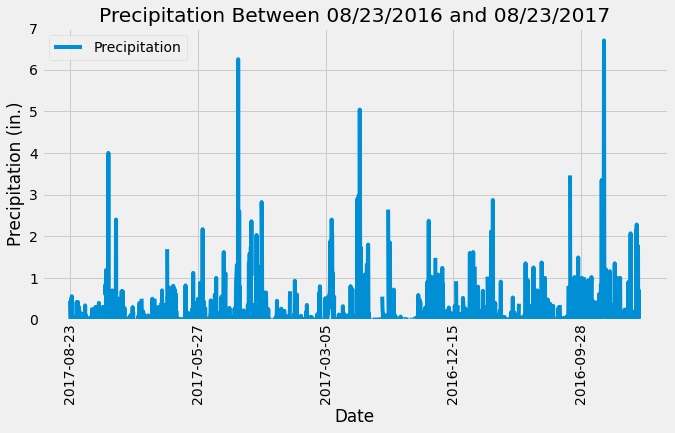

In [9]:
precip_12mnths_df.plot(
    figsize=(10,5),
    ylim=(0,7),
    title="Precipitation Between 08/23/2016 and 08/23/2017",
    xlabel="Date",
    ylabel="Precipitation (in.)",
    rot=90
    
)

plt
plt.show()

#### Use Pandas to calcualte the summary statistics for the precipitation data

In [10]:
precip_12mnths_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### Design a query to calculate the total number of stations.

In [25]:
station_count = session.query(func.count(Station.id)).all()
print(station_count)

[(9,)]


#### What are the most active stations? (i.e. what stations have the most rows)?
* List the stations and the counts in descending order.

In [11]:
pprint(session.query(Measurement.station, 
func.count(Measurement.id))
.group_by(Measurement.station)
.order_by(func.count(Measurement.station).desc()).all())

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


#### Using the station id from the previous query calculate the following.
* lowest temperature recorded
* highest temperature recorded
* average temperature of 

In [12]:
# Lowest Temperature Recorded
pprint(session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").first()[0])

54.0


In [13]:
# Highest Temperature Recorded
pprint(session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").first()[0])

85.0


In [14]:
# Average Temperature
pprint(session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").first()[0])

71.66378066378067


#### Choose the station with the highest number of temperature observations.

In [15]:
pprint(session.query(Measurement.station, 
func.count(Measurement.tobs))
.group_by(Measurement.station)
.order_by(func.count(Measurement.tobs).desc()).all())

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


#### Query the last 12 months of temperature observation data for this station

In [27]:
temp_12mnths_q = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519281").filter(
    and_(Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23"))
temp_12mnths = temp_12mnths_q.all()
temp_12mnths_df = pd.DataFrame(temp_12mnths).rename(columns={"date": "Date", "tobs": "Temp (F)"})

temp_12mnths_df.sort_values(by=["Date"], inplace=True, ascending=False)
temp_12mnths_df.set_index("Date", inplace=True)
temp_12mnths_df

,Temp (F)
Date,
2017-08-18,79.0
2017-08-17,76.0
2017-08-16,76.0
2017-08-15,77.0
2017-08-14,77.0
...,...
2016-08-27,75.0
2016-08-26,80.0
2016-08-25,80.0


#### Plot the results as a histogram

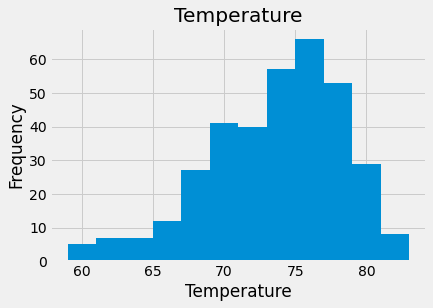

In [17]:
temp_hist = temp_12mnths_df.hist(bins=12)
for ax in temp_hist.flatten():
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Using dates 2017 because that is the last year included in this database.
print("[(TMIN, TAVE, TMAX)]")
print(calc_temps('2017-02-13', '2017-02-23'))

[(TMIN, TAVE, TMAX)]
[(65.0, 72.1029411764706, 80.0)]


#### Plot the results from your previous query as a bar chart. 
* Use "Trip Avg Temp" as your Title
* Use the average temperature for the y value
* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [20]:
# Creating DataFrame
data = {"TMIN": [65.0], "TAVE": [72.1029411764706], "TMAX": [80.0]}
df = pd.DataFrame(data)
df

,TMIN,TAVE,TMAX
0,65.0,72.102941,80.0


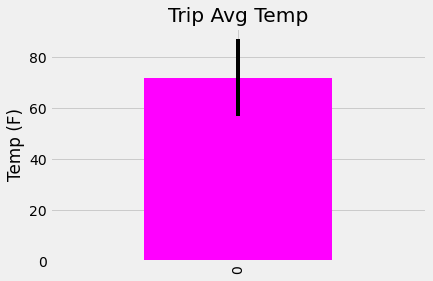

In [21]:
fig, ax = plt.subplots()
df["TAVE"].plot.bar(yerr=(df["TMAX"] - df["TMIN"]), title="Trip Avg Temp", xlabel="", ylabel="Temp (F)", color="Magenta")
plt.show()

#### Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
* Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [22]:
# Creating a DataFrame that will show the rain measurements for the previous year during my planned vacation.
trip_precip_q = session.query(Measurement.date, Measurement.station, Measurement.prcp).filter(
    and_(Measurement.date >= "2017-02-13", Measurement.date <= "2017-02-23"))

trip_precip = trip_precip_q.all()
trip_precip_df = pd.DataFrame(trip_precip)
trip_precip_df.sort_values(by=["date"], inplace=True, ascending=False)
trip_precip_df

,date,station,prcp
67,2017-02-23,USC00516128,0.00
10,2017-02-23,USC00519397,0.01
46,2017-02-23,USC00519523,0.00
38,2017-02-23,USC00517948,0.00
30,2017-02-23,USC00514830,0.00
...,...,...,...
31,2017-02-13,USC00517948,NaN
11,2017-02-13,USC00513117,2.90
47,2017-02-13,USC00519281,0.01
39,2017-02-13,USC00519523,0.00


#### Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
* Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [23]:
# Creating a DataFrame from query to show all of the weather stations.
station_q = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation)
station = station_q.all()

station_df = pd.DataFrame(station)
station_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [24]:
# Merging two DataFrames and then grouping them by station and name to show the sum of rain that was recorded at each station.
trip_station_df = pd.merge(trip_precip_df, station_df, on=["station"], how="inner")
trip_station_grouped = trip_station_df.groupby(["station", "name"], as_index=False).sum()
trip_station_grouped.sort_values(by=["prcp"], ascending=False, inplace=True)
trip_station_grouped

,station,name,prcp,latitude,longitude,elevation
0,USC00513117,"KANEOHE 838.1, HI US",3.76,235.65740,-1735.81650,160.6
4,USC00519281,"WAIHEE 837.5, HI US",1.03,235.96837,-1736.33779,361.9
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.87,170.68448,-1261.69112,156.0
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.79,193.69170,-1420.53660,63.0
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.70,213.33100,-1578.02500,1524.0
5,USC00519397,"WAIKIKI 717.2, HI US",0.21,233.98760,-1735.98480,33.0
3,USC00517948,"PEARL CITY, HI US",0.17,171.14720,-1263.80080,95.2
